In [292]:
#Base de dados: Covid19br (https://github.com/wcota/covid19br/)

In [293]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


covid_dataset_cities = pd.read_csv('c:\\Users\\gbdfigu\\Desktop\\Ada_Project_Avancado\\dataset\\cases-brazil-cities.csv')
covid_dataset_state = pd.read_csv('c:\\Users\\gbdfigu\\Desktop\\Ada_Project_Avancado\\dataset\\cases-brazil-states.csv')
covid_dataset_total = pd.read_csv('c:\\Users\\gbdfigu\\Desktop\\Ada_Project_Avancado\\dataset\\cases-brazil-total.csv')
covid_dataset_time_total = pd.read_csv('c:\\Users\\gbdfigu\\Desktop\\Ada_Project_Avancado\\dataset\\cases-brazil-cities-time_changesOnly.csv')

In [294]:
covid_dataset_clean = covid_dataset_time_total[covid_dataset_time_total['state'] != 'TOTAL']
covid_dataset_clean = covid_dataset_time_total[covid_dataset_time_total['state'] == 'SP']
covid_dataset_clean = covid_dataset_clean[covid_dataset_clean['city'] != 'CASO SEM LOCALIZAÇÃO DEFINIDA']
pattern = 'CASO SEM LOCALIZAÇÃO DEFINIDA.*'
covid_dataset_clean = covid_dataset_clean[~covid_dataset_clean['city'].str.contains(pattern)]

covid_dataset_cities = covid_dataset_cities.drop(columns=['ibgeID', 'deaths_per_100k_inhabitants', 'totalCases_per_100k_inhabitants', 'deaths_by_totalCases', '_source', 'date', 'newCases', 'newDeaths', 'last_info_date'])
covid_dataset_clean

,epi_week,date,country,state,city,ibgeID,newDeaths,deaths,newCases,totalCases,deaths_per_100k_inhabitants,totalCases_per_100k_inhabitants,deaths_by_totalCases,_source,last_info_date
0,9,2020-02-25,Brazil,SP,São Paulo/SP,3550308,0,0,1,1,0.000,0.008,0.000,SES,2021-12-06
2,9,2020-02-28,Brazil,SP,São Paulo/SP,3550308,0,0,1,2,0.000,0.016,0.000,SES,2021-12-06
4,10,2020-03-04,Brazil,SP,São Paulo/SP,3550308,0,0,1,3,0.000,0.024,0.000,SES,2021-12-06
7,10,2020-03-05,Brazil,SP,São Paulo/SP,3550308,0,0,3,6,0.000,0.048,0.000,SES,2021-12-06
17,10,2020-03-07,Brazil,SP,Santana de Parnaíba/SP,3547304,0,0,1,1,0.000,0.689,0.000,SES,2021-12-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2096327,311,2023-03-18,Brazil,SP,Vinhedo/SP,3556701,0,252,11,18775,309.142,23032.288,0.013,MS,2023-03-18
2096335,311,2023-03-18,Brazil,SP,Votuporanga/SP,3557105,0,510,221,28590,530.664,29748.403,0.018,MS,2023-03-18
2096337,311,2023-03-18,Brazil,SP,Várzea Paulista/SP,3556503,1,313,-12,15003,251.873,12073.003,0.021,MS,2023-03-18
2096356,311,2023-03-18,Brazil,SP,Águas da Prata/SP,3500402,0,39,4,2174,472.041,26313.241,0.018,MS,2023-03-18


In [295]:
max = covid_dataset_cities['totalCases'].max()
covid_dataset_cities[covid_dataset_cities['totalCases'] == max]

,country,state,city,deaths,totalCases
4225,Brazil,RJ,Rio de Janeiro/RJ,38144,1316242


In [296]:
covid_dataset_cities = covid_dataset_cities.groupby(['state','country']).sum()

In [297]:
top_10_states_cases =covid_dataset_cities.nlargest(n=10, columns=['totalCases'], keep='all').drop(columns=['city'])
top_10_states_cases

,,deaths,totalCases
state,country,,
SP,Brazil,179039,6469442
MG,Brazil,65507,4189760
RS,Brazil,41921,2962414
PR,Brazil,46022,2920177
RJ,Brazil,76852,2754359
SC,Brazil,22703,1986447
GO,Brazil,28041,1900459
BA,Brazil,31459,1792572
CE,Brazil,28157,1453417


In [298]:
covid_dataset_clean = covid_dataset_clean[['state', 'newCases', 'date']]
covid_dataset_clean['date'] = pd.to_datetime(covid_dataset_clean['date'], format='ISO8601')
covid_dataset_clean['ano'] = covid_dataset_clean['date'].dt.year.astype(str)
covid_dataset_clean = covid_dataset_clean[covid_dataset_clean['ano'] >= '2022']
covid_dataset_clean['mes_ano'] = covid_dataset_clean['date'].dt.year.astype(str) + '-' + covid_dataset_clean['date'].dt.month.astype(str)
covid_dataset_clean = covid_dataset_clean[['state','newCases','mes_ano']].groupby(['state', 'mes_ano'], as_index=False).sum()
covid_dataset_clean

C:\Users\gbdfigu\AppData\Local\Temp\ipykernel_2452\2203192098.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_dataset_clean['date'] = pd.to_datetime(covid_dataset_clean['date'], format='ISO8601')
C:\Users\gbdfigu\AppData\Local\Temp\ipykernel_2452\2203192098.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_dataset_clean['ano'] = covid_dataset_clean['date'].dt.year.astype(str)


,state,mes_ano,newCases
0,SP,2022-1,189998
1,SP,2022-10,47418
2,SP,2022-11,46970
3,SP,2022-12,124775
4,SP,2022-2,371347
5,SP,2022-3,240240
6,SP,2022-4,131652
7,SP,2022-5,122594
8,SP,2022-6,206553
9,SP,2022-7,200954


In [299]:
covid_dataset_clean['mes_ano']

0      2022-1
1     2022-10
2     2022-11
3     2022-12
4      2022-2
5      2022-3
6      2022-4
7      2022-5
8      2022-6
9      2022-7
10     2022-8
11     2022-9
12     2023-1
13     2023-2
14     2023-3
Name: mes_ano, dtype: object

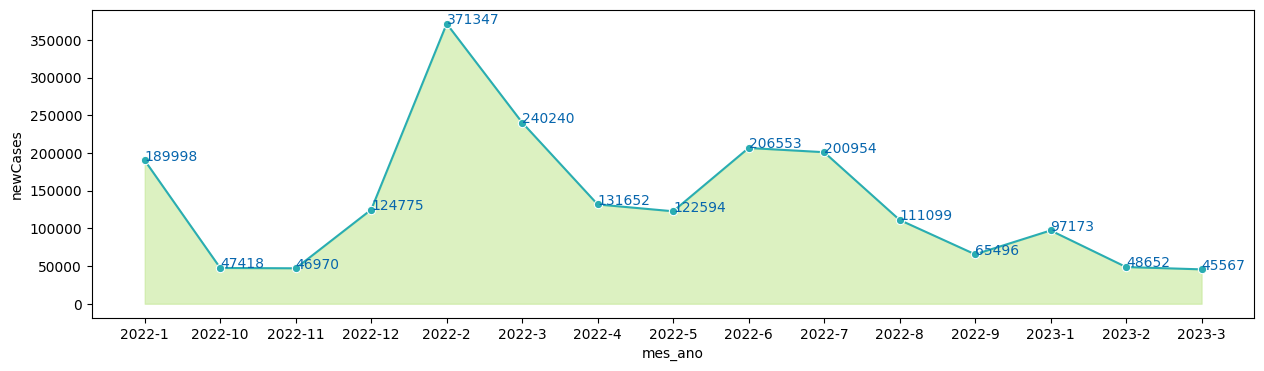

In [312]:
fig = plt.figure(figsize=(15,4))

#c = sns.lineplot(covid_dataset_clean['mes_ano'], covid_dataset_clean['newCases'])

sns.lineplot(data=covid_dataset_clean, x='mes_ano', y='newCases', marker='o', color='#29ADB2')
plt.fill_between(covid_dataset_clean['mes_ano'], covid_dataset_clean['newCases'], color='#C5E898', alpha=0.6)

for x, y in zip(covid_dataset_clean['mes_ano'], covid_dataset_clean['newCases']):
    plt.text(x = x, y = y-150, s = '{:.0f}'.format(y), color = '#0766AD')

plt.show()
